In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
import matplotlib
import re
matplotlib.style.use('ggplot')

# 1. VAR Process

In the data `raotb16.csv` we have some macroeconomic data.

1. Test which series Granger cause each other.

2. Test which series are stationary

3. Fit a VAR on the system of time series. Find the best number of lags. Don't forget to differentiate the series that need it.

4. Fit a VAR on everything except the last 12 months (4 quarters) of the data. Backtest your model against the actual last year in the data. Plot the predictions against the data for each series.

In [4]:
#rgnp : real gross national product
#pgnp : potential gross national product
#ulc : unit labor cost
#gdfco :  the fixed weight deflator for personal consumption expenditure excluding food and energy?
#gdfim : the fixed-weight import deflator
#gdfcf :  the fixed-weight deflator for food in personal consumption expenditure
#gdfce :  the fixedweight deflator for energy in personal consumption expenditure

In [5]:
df = pd.read_csv('data/raotb16.csv', index_col = 'date', parse_dates = True)
df

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8
...,...,...,...,...,...,...,...,...
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0


In [6]:
#1 See answer 1 after answer 4 which is shown below

In [7]:
#2 Test which series are stationary

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    '''
    The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit 
    root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.
    '''
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

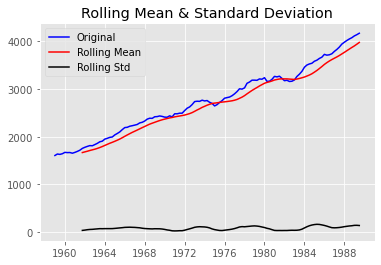

Results of Dickey-Fuller Test:
rgnp
Test Statistic                   0.641882
p-value                          0.988604
#Lags Used                       2.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64

Fail to reject null hypothesis that there is a unit root. Therefore, rgnp series is non-stationary.


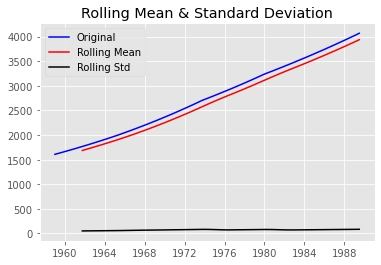

Results of Dickey-Fuller Test:
pgnp
Test Statistic                   1.274320
p-value                          0.996461
#Lags Used                       1.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64

Fail to reject null hypothesis that there is a unit root. Therefore, pgnp series is non-stationary.


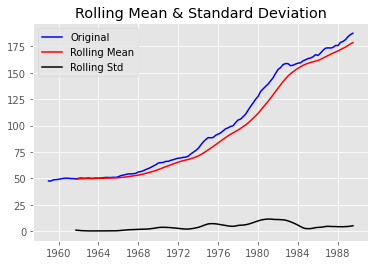

Results of Dickey-Fuller Test:
ulc
Test Statistic                   1.396716
p-value                          0.997099
#Lags Used                       2.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64

Fail to reject null hypothesis that there is a unit root. Therefore, ulc series is non-stationary.


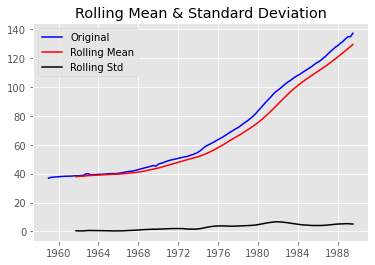

Results of Dickey-Fuller Test:
gdfco
Test Statistic                   0.576191
p-value                          0.987014
#Lags Used                       5.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64

Fail to reject null hypothesis that there is a unit root. Therefore, gdfco series is non-stationary.


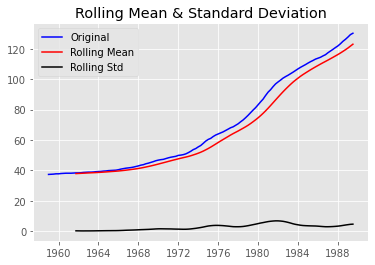

Results of Dickey-Fuller Test:
gdf
Test Statistic                   1.112860
p-value                          0.995325
#Lags Used                       7.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64

Fail to reject null hypothesis that there is a unit root. Therefore, gdf series is non-stationary.


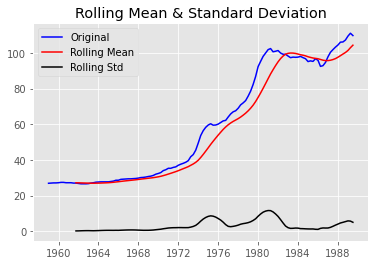

Results of Dickey-Fuller Test:
gdfim
Test Statistic                  -0.198720
p-value                          0.938674
#Lags Used                       1.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64

Fail to reject null hypothesis that there is a unit root. Therefore, gdfim series is non-stationary.


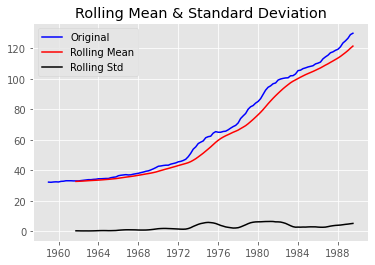

Results of Dickey-Fuller Test:
gdfcf
Test Statistic                   1.669255
p-value                          0.998051
#Lags Used                       9.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64

Fail to reject null hypothesis that there is a unit root. Therefore, gdfcf series is non-stationary.


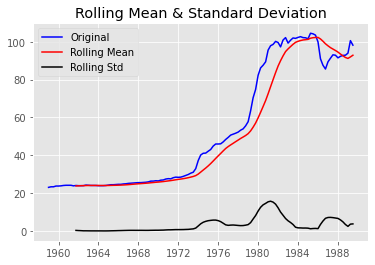

Results of Dickey-Fuller Test:
gdfce
Test Statistic                  -0.815918
p-value                          0.814402
#Lags Used                      13.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64

Fail to reject null hypothesis that there is a unit root. Therefore, gdfce series is non-stationary.


In [9]:
cols = df.columns
for c in cols:

    output = test_stationarity(df[c])

    print(c)
    print(output)
    if output['p-value'] > 0.05:
        print(f'\nFail to reject null hypothesis that there is a unit root. Therefore, {c} series is non-stationary.')
    else:
        print(f'\nReject null hypothesis that there is a unit root. Therefore, {c} series is stationary.')


In [10]:
#3 Fit a VAR on the system of time series. Find the best number of lags. Don't forget to differentiate the series that 
# need it.

In [11]:
#Transform data to make series stationary
ts_log = np.log(df)
ts_diff = ts_log - ts_log.shift()
ts_diff = ts_diff -ts_diff.shift()
ts_diff.dropna(inplace = True)



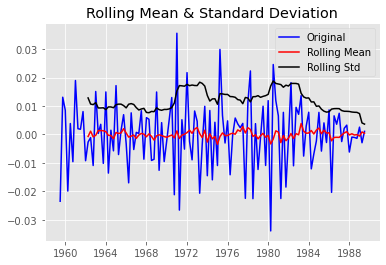

Results of Dickey-Fuller Test:
rgnp
Test Statistic                -7.280776e+00
p-value                        1.502447e-10
#Lags Used                     4.000000e+00
Number of Observations Used    1.160000e+02
Critical Value (1%)           -3.488022e+00
Critical Value (5%)           -2.886797e+00
Critical Value (10%)          -2.580241e+00
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, rgnp series is stationary.


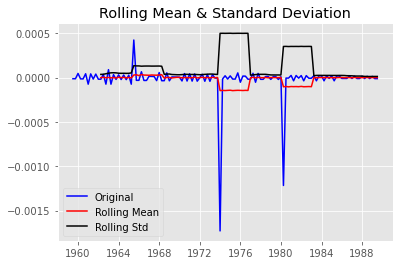

Results of Dickey-Fuller Test:
pgnp
Test Statistic                -1.122156e+01
p-value                        2.007616e-20
#Lags Used                     0.000000e+00
Number of Observations Used    1.200000e+02
Critical Value (1%)           -3.486056e+00
Critical Value (5%)           -2.885943e+00
Critical Value (10%)          -2.579785e+00
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, pgnp series is stationary.


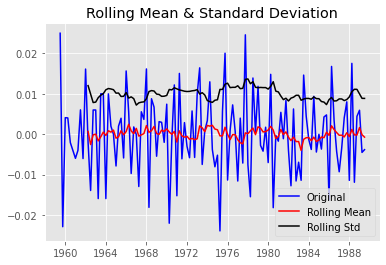

Results of Dickey-Fuller Test:
ulc
Test Statistic                -1.210284e+01
p-value                        1.999949e-22
#Lags Used                     1.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, ulc series is stationary.


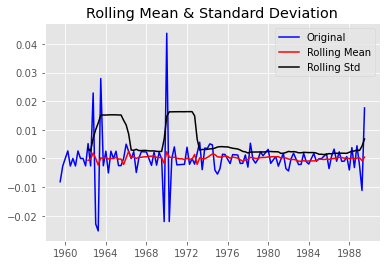

Results of Dickey-Fuller Test:
gdfco
Test Statistic                -9.471516e+00
p-value                        4.094239e-16
#Lags Used                     3.000000e+00
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, gdfco series is stationary.


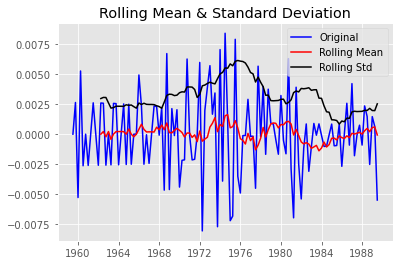

Results of Dickey-Fuller Test:
gdf
Test Statistic                  -4.862745
p-value                          0.000041
#Lags Used                      13.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, gdf series is stationary.


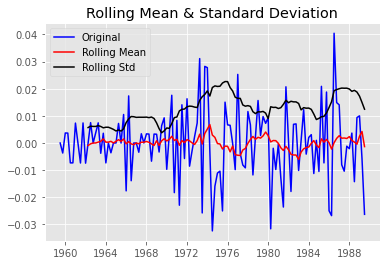

Results of Dickey-Fuller Test:
gdfim
Test Statistic                -1.267762e+01
p-value                        1.206173e-23
#Lags Used                     0.000000e+00
Number of Observations Used    1.200000e+02
Critical Value (1%)           -3.486056e+00
Critical Value (5%)           -2.885943e+00
Critical Value (10%)          -2.579785e+00
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, gdfim series is stationary.


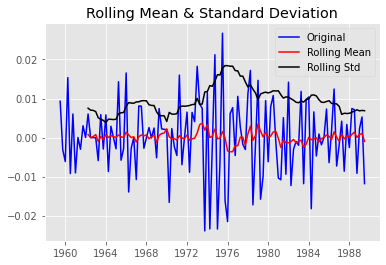

Results of Dickey-Fuller Test:
gdfcf
Test Statistic                  -5.646969
p-value                          0.000001
#Lags Used                      12.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, gdfcf series is stationary.


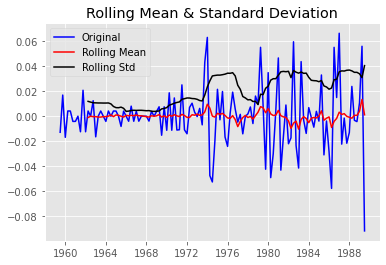

Results of Dickey-Fuller Test:
gdfce
Test Statistic                  -4.769658
p-value                          0.000062
#Lags Used                      11.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, gdfce series is stationary.


In [12]:
cols = ts_diff.columns
for c in cols:

    output = test_stationarity(ts_diff[c])

    print(c)
    print(output)
    if output['p-value'] > 0.05:
        print(f'\nFail to reject null hypothesis that there is a unit root. Therefore, {c} series is non-stationary.')
    else:
        print(f'\nReject null hypothesis that there is a unit root. Therefore, {c} series is stationary.')


C:\Users\education\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


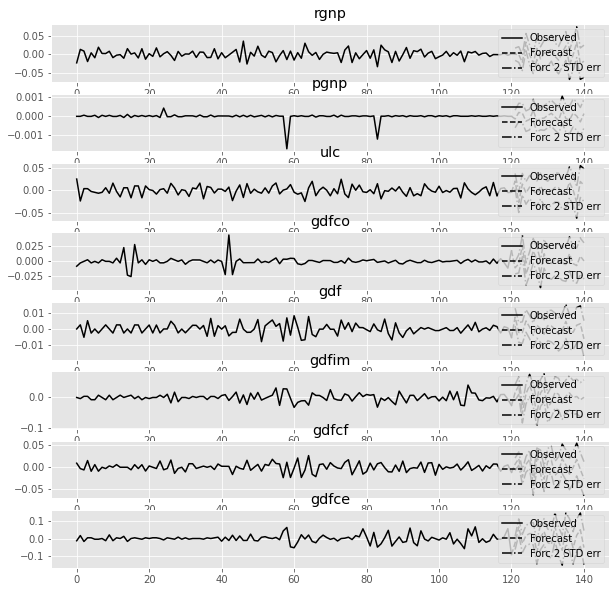

In [13]:
model = VAR(ts_diff)
model.select_order(10)
results = model.fit(maxlags=10, ic='aic')
results.plot_forecast(20);

In [14]:
#4 Fit a VAR on everything except the last 12 months (4 quarters) of the data. Backtest your model against the actual last year in the data. 
# Plot the predictions against the data for each series.

train = ts_diff[:-4]
test = ts_diff[-4:]

model = VAR(train)
model.select_order(10)
results = model.fit(maxlags=10, ic='aic')
lag_order = results.k_ar
predictions = pd.DataFrame(results.forecast(train.values[-lag_order:], 4), columns = cols)
predictions['date'] = test.index
predictions = predictions.set_index('date', drop = True)
predictions


C:\Users\education\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-10-01,0.013508,0.000428,-0.014763,-0.008421,-0.006796,-0.028728,-0.025104,-0.034037
1989-01-01,-0.011524,-0.000354,0.005537,0.011441,0.003291,0.003339,0.025116,-0.002180
1989-04-01,0.003955,-0.000060,0.002372,-0.004223,-0.002890,0.026083,-0.009297,0.038014
1989-07-01,-0.018663,-0.000069,0.017218,0.004357,0.000922,0.020685,-0.008010,-0.001100


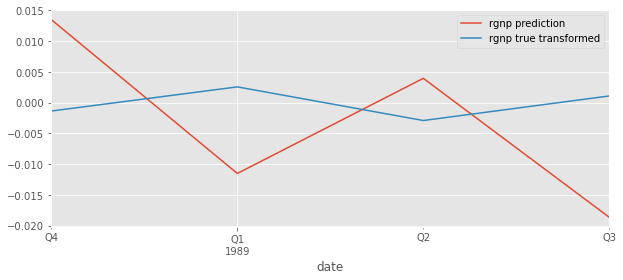

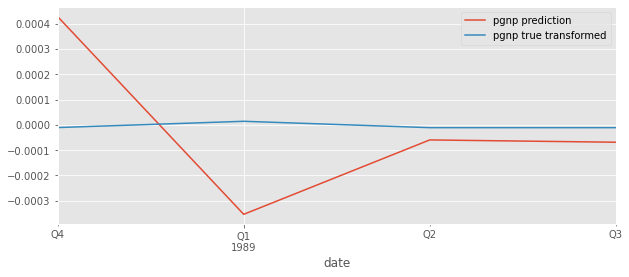

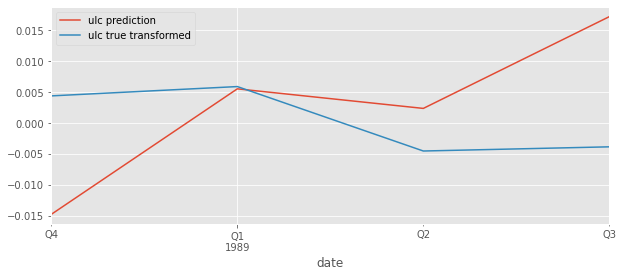

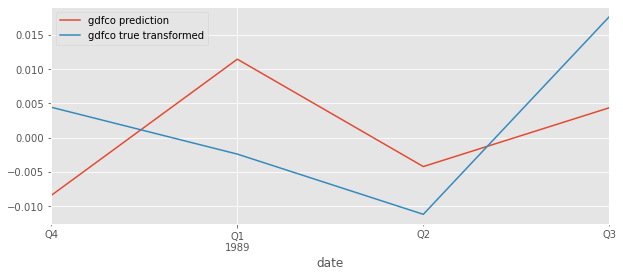

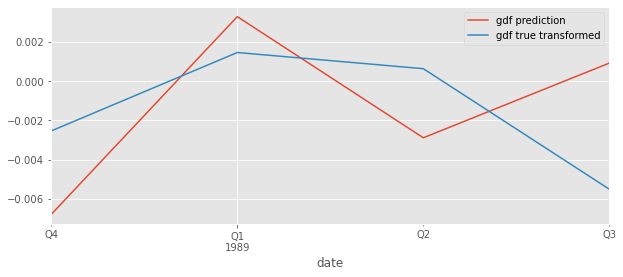

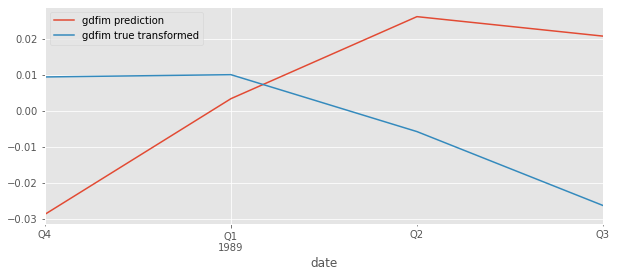

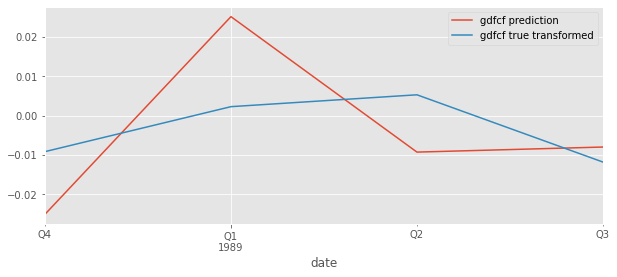

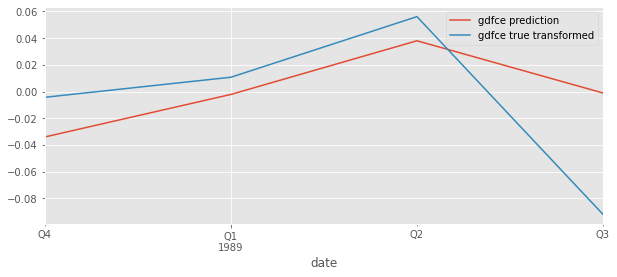

In [15]:
for c in cols:
    fig, ax = plt.subplots(1,1, figsize = (10,4))
    ax = predictions[c].plot(label = f'{c} prediction', legend = True)
    ax = test[c].plot(label =f'{c} true transformed', legend= True)
    

In [16]:
cols

Index(['rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce'], dtype='object')

In [17]:
#1 Test which series Granger cause each other.
# It seems that none of the variable are the granger cause of another variable in the dataset.

cols = df.columns
for c1 in list(cols) :
    updated_cols = list(cols)
    updated_cols.remove(c1)

    for c2 in updated_cols:
        test_causality = results.test_causality(c1,c2, kind='f').summary()
        print(f'caused:{c1}, causing: {c2}\n')
        print(test_causality)
        print('\n')

caused:rgnp, causing: pgnp

Granger causality F-test. H_0: pgnp does not Granger-cause rgnp. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
        0.8293          1.876   0.601 (10, 208)
-----------------------------------------------


caused:rgnp, causing: ulc

Granger causality F-test. H_0: ulc does not Granger-cause rgnp. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         1.182          1.876   0.305 (10, 208)
-----------------------------------------------


caused:rgnp, causing: gdfco

Granger causality F-test. H_0: gdfco does not Granger-cause rgnp. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
        0.7531          1.876   0.674 (10, 208)
------------------


Granger causality F-test. H_0: rgnp does not Granger-cause gdf. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
        0.8421          1.876   0.589 (10, 208)
-----------------------------------------------


caused:gdf, causing: pgnp

Granger causality F-test. H_0: pgnp does not Granger-cause gdf. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
        0.2547          1.876   0.990 (10, 208)
-----------------------------------------------


caused:gdf, causing: ulc

Granger causality F-test. H_0: ulc does not Granger-cause gdf. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
        0.4483          1.876   0.921 (10, 208)
-----------------------------------------------


ca

# 2. Gun Violence Panel

The [Gun Violence](https://www.kaggle.com/jameslko/gun-violence-data) dataset

1. Transform it into an amenable panel (or structure of multiple time series) to analyze and create a forecast for the next year outside the sample in **Chicago**, **Washington** and **New Orleans**, and the US as a whole.

2. Are there other (non time series) predictors which could be used in this dataset to help predict severity or number of shootings in the future? Analyze the data for feature importance and explain your findings.

In [18]:
#2.1

In [19]:
df2 = pd.read_csv('data/archive (1)/gun-violence-data_01-2013_03-2018.csv')
df2['date'] = pd.to_datetime(df2['date'])
df2['year'] = pd.DatetimeIndex(df2['date']).year
df2['month'] = pd.DatetimeIndex(df2['date']).month
df2['day'] = 1
df2['time'] = pd.to_datetime(df2[['year', 'month', 'day']])
#Missing values for every month in 2013 according to information on dataset
df2 = df2[df2['year']>=2014]

In [20]:
df2 = df2.reset_index(drop = True)
df2

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,day,time
0,95289,2014-01-01,Michigan,Muskegon,300 block of Monroe Avenue,0,0,http://www.gunviolencearchive.org/incident/95289,http://www.mlive.com/news/muskegon/index.ssf/2...,False,...,NaN,0::Unharmed,0::Victim,http://www.mlive.com/news/muskegon/index.ssf/2...,92.0,34.0,2014,1,1,2014-01-01
1,92401,2014-01-01,New Jersey,Newark,Central Avenue,0,0,http://www.gunviolencearchive.org/incident/92401,http://www.nj.com/essex/index.ssf/2014/01/newa...,False,...,NaN,NaN,NaN,http://www.nj.com/essex/index.ssf/2014/01/newa...,29.0,29.0,2014,1,1,2014-01-01
2,92383,2014-01-01,New York,Queens,113th Avenue,1,0,http://www.gunviolencearchive.org/incident/92383,http://www.timesledger.com/stories/2014/2/firs...,False,...,NaN,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.timesledger.com/stories/2014/2/firs...,33.0,14.0,2014,1,1,2014-01-01
3,92142,2014-01-01,New York,Brooklyn,St. Johns Place,0,1,http://www.gunviolencearchive.org/incident/92142,http://www.nydailynews.com/new-york/nyc-crime/...,False,...,NaN,0::Injured,0::Victim||1::Subject-Suspect,http://www.nydailynews.com/new-york/nyc-crime/...,43.0,20.0,2014,1,1,2014-01-01
4,95261,2014-01-01,Missouri,Springfield,Beverly Hills and Temple,0,1,http://www.gunviolencearchive.org/incident/95261,http://www.ozarksfirst.com/story/deputies-6-ye...,False,...,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.ozarksfirst.com/story/deputies-6-ye...,131.0,30.0,2014,1,1,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239394,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN,2018,3,1,2018-03-01
239395,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,2018,3,1,2018-03-01
239396,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,2018,3,1,2018-03-01
239397,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,...,NaN,0::Killed,0::Victim,http://www.khou.com/article/news/hpd-investiga...,149.0,17.0,2018,3,1,2018-03-01


In [21]:
df2_city = df2.groupby(['city_or_county', 'time']).sum()[['n_killed', 'n_injured']]
df2_city

n_killed  n_injured
city_or_county            time                           
Abbeville                 2014-01-01         0          1
                          2014-02-01         0          1
                          2014-06-01         1          1
                          2014-08-01         1          0
                          2014-09-01         0          1
...                                        ...        ...
Zumbro Falls              2017-07-01         0          0
Zumbrota                  2017-12-01         0          1
Zuni (Zuni Pueblo)        2014-08-01         0          0
Zwolle                    2016-04-01         0          0
jefferson parish (county) 2016-03-01         0          2

[73668 rows x 2 columns]

In [22]:
df_chicago = df2_city.loc[('Chicago',)]
df_chicago

,n_killed,n_injured
time,,
2014-01-01,21,68
2014-02-01,22,40
2014-03-01,17,92
2014-04-01,36,201
2014-05-01,44,198
2014-06-01,35,204
2014-07-01,50,237
2014-08-01,48,208
2014-09-01,36,174


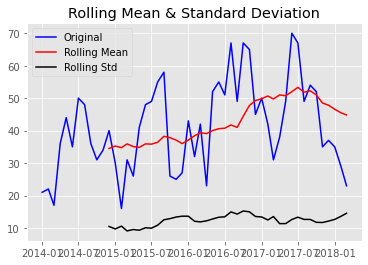

Results of Dickey-Fuller Test:
n_killed
Test Statistic                 -3.522624
p-value                         0.007425
#Lags Used                      0.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, n_killed series is stationary.


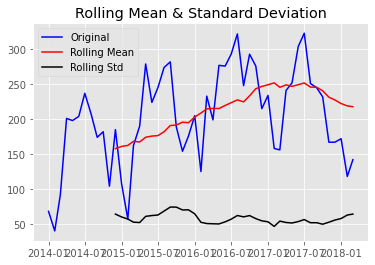

Results of Dickey-Fuller Test:
n_injured
Test Statistic                 -3.346520
p-value                         0.012923
#Lags Used                      0.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, n_injured series is stationary.


In [23]:
cols = df_chicago.columns
for c in cols:

    output = test_stationarity(df_chicago[c])

    print(c)
    print(output)
    if output['p-value'] > 0.05:
        print(f'\nFail to reject null hypothesis that there is a unit root. Therefore, {c} series is non-stationary.')
    else:
        print(f'\nReject null hypothesis that there is a unit root. Therefore, {c} series is stationary.')

Chicago


C:\Users\education\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


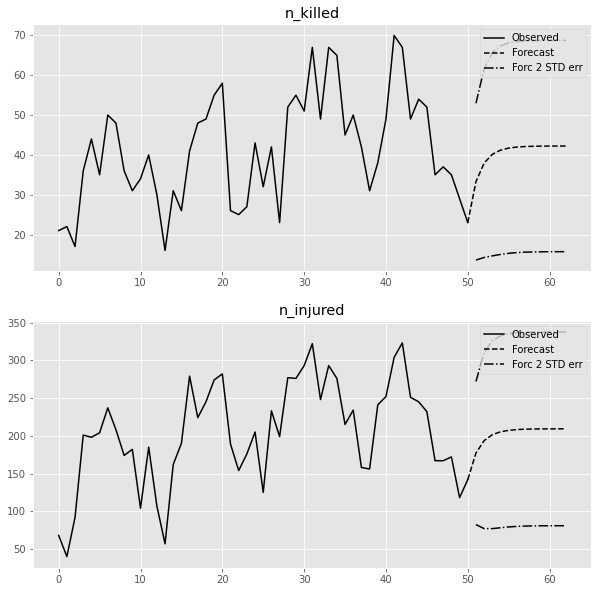

In [24]:
model = VAR(df_chicago)
model.select_order(10)
results = model.fit(maxlags=10, ic='aic')
print('Chicago')
results.plot_forecast(12);

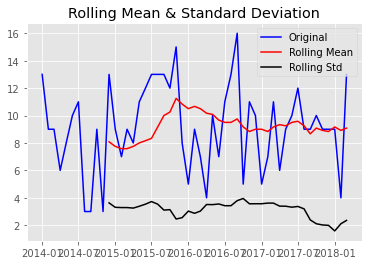

Results of Dickey-Fuller Test:
n_killed
Test Statistic                -6.133361e+00
p-value                        8.298859e-08
#Lags Used                     0.000000e+00
Number of Observations Used    5.000000e+01
Critical Value (1%)           -3.568486e+00
Critical Value (5%)           -2.921360e+00
Critical Value (10%)          -2.598662e+00
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, n_killed series is stationary.


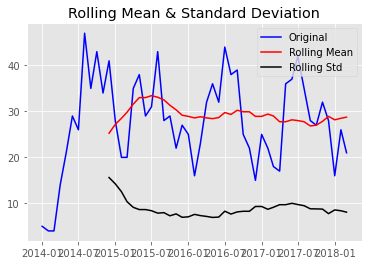

Results of Dickey-Fuller Test:
n_injured
Test Statistic                 -4.988203
p-value                         0.000023
#Lags Used                      5.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, n_injured series is stationary.


In [25]:
#Washington 
#Filter for the city
df_washington = df2_city.loc[('Washington',)]

#Verify if the series are stationary
cols = df_washington.columns
for c in cols:

    output = test_stationarity(df_washington[c])

    print(c)
    print(output)
    if output['p-value'] > 0.05:
        print(f'\nFail to reject null hypothesis that there is a unit root. Therefore, {c} series is non-stationary.')
    else:
        print(f'\nReject null hypothesis that there is a unit root. Therefore, {c} series is stationary.')

Washington


C:\Users\education\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


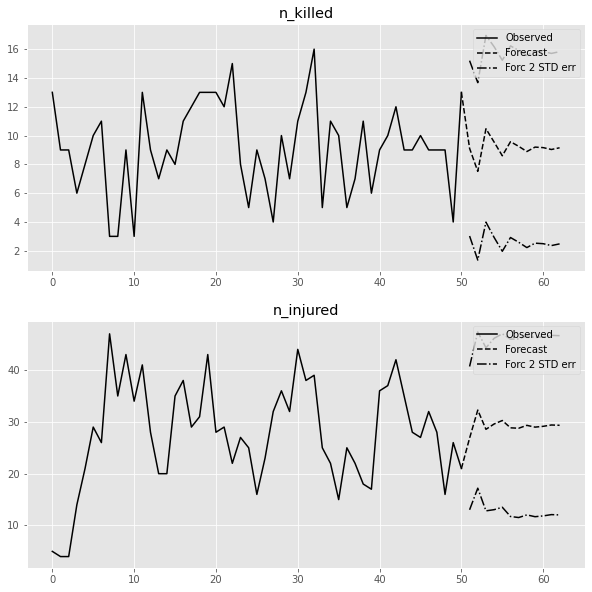

In [26]:
model = VAR(df_washington)
model.select_order(10)
results = model.fit(maxlags=10, ic='aic')
print('Washington')
results.plot_forecast(12);

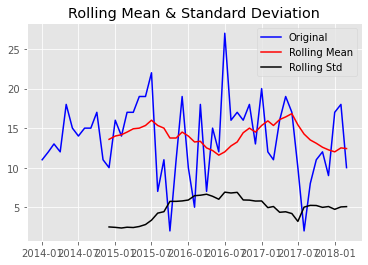

Results of Dickey-Fuller Test:
n_killed
Test Statistic                -5.781777e+00
p-value                        5.106092e-07
#Lags Used                     0.000000e+00
Number of Observations Used    5.000000e+01
Critical Value (1%)           -3.568486e+00
Critical Value (5%)           -2.921360e+00
Critical Value (10%)          -2.598662e+00
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, n_killed series is stationary.


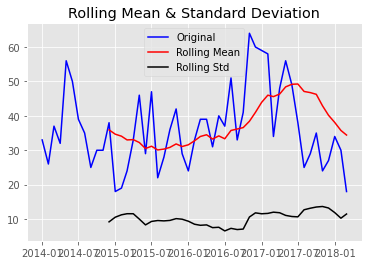

Results of Dickey-Fuller Test:
n_injured
Test Statistic                 -3.749149
p-value                         0.003473
#Lags Used                      0.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, n_injured series is stationary.


In [27]:
# New Orleans
#Filter for the city
df_new_orleans = df2_city.loc[('New Orleans',)]

#Verify if the series are stationary
cols = df_new_orleans.columns
for c in cols:

    output = test_stationarity(df_new_orleans[c])

    print(c)
    print(output)
    if output['p-value'] > 0.05:
        print(f'\nFail to reject null hypothesis that there is a unit root. Therefore, {c} series is non-stationary.')
    else:
        print(f'\nReject null hypothesis that there is a unit root. Therefore, {c} series is stationary.')

New Orleans


C:\Users\education\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


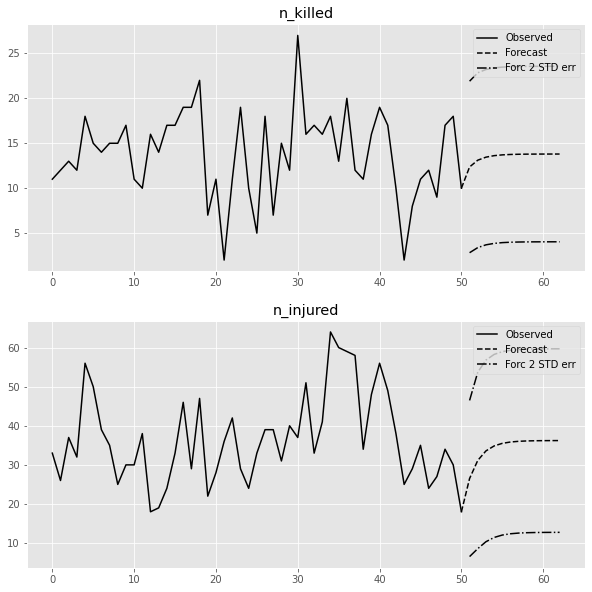

In [28]:
model = VAR(df_new_orleans)
model.select_order(10)
results = model.fit(maxlags=10, ic='aic')
print('New Orleans')
results.plot_forecast(12);

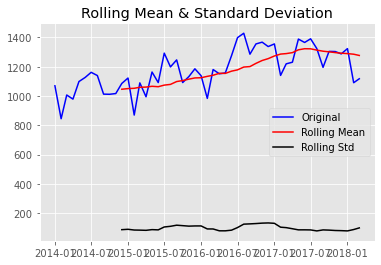

Results of Dickey-Fuller Test:
n_killed
Test Statistic                 -2.507701
p-value                         0.113612
#Lags Used                      1.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64

Fail to reject null hypothesis that there is a unit root. Therefore, n_killed series is non-stationary.


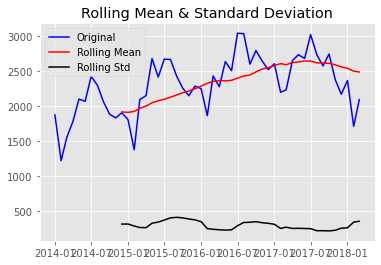

Results of Dickey-Fuller Test:
n_injured
Test Statistic                 -2.328972
p-value                         0.162794
#Lags Used                     11.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64

Fail to reject null hypothesis that there is a unit root. Therefore, n_injured series is non-stationary.


In [29]:
#The US as a whole
df_us = df2.groupby(['time']).sum()[['n_killed', 'n_injured']]
df_us

#Verify if the series are stationary
cols = df_us.columns
for c in cols:

    output = test_stationarity(df_us[c])

    print(c)
    print(output)
    if output['p-value'] > 0.05:
        print(f'\nFail to reject null hypothesis that there is a unit root. Therefore, {c} series is non-stationary.')
    else:
        print(f'\nReject null hypothesis that there is a unit root. Therefore, {c} series is stationary.')

In [30]:
#Transform data to make series stationary
ts_log = np.log(df_us)
ts_diff = ts_log - ts_log.shift()
ts_diff = ts_diff -ts_diff.shift()
ts_diff.dropna(inplace = True)


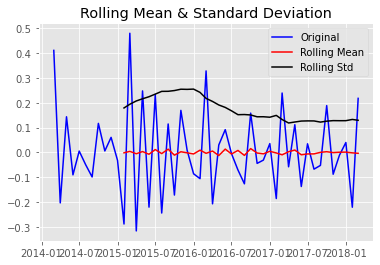

Results of Dickey-Fuller Test:
n_killed
Test Statistic                -5.693041e+00
p-value                        7.989528e-07
#Lags Used                     1.100000e+01
Number of Observations Used    3.700000e+01
Critical Value (1%)           -3.620918e+00
Critical Value (5%)           -2.943539e+00
Critical Value (10%)          -2.610400e+00
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, n_killed series is stationary.


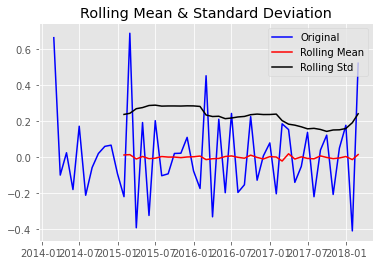

Results of Dickey-Fuller Test:
n_injured
Test Statistic                -8.286838e+00
p-value                        4.367608e-13
#Lags Used                     1.000000e+01
Number of Observations Used    3.800000e+01
Critical Value (1%)           -3.615509e+00
Critical Value (5%)           -2.941262e+00
Critical Value (10%)          -2.609200e+00
dtype: float64

Reject null hypothesis that there is a unit root. Therefore, n_injured series is stationary.


In [31]:
#Verify if the series are stationary
cols = ts_diff.columns
for c in cols:

    output = test_stationarity(ts_diff[c])

    print(c)
    print(output)
    if output['p-value'] > 0.05:
        print(f'\nFail to reject null hypothesis that there is a unit root. Therefore, {c} series is non-stationary.')
    else:
        print(f'\nReject null hypothesis that there is a unit root. Therefore, {c} series is stationary.')

US


C:\Users\education\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


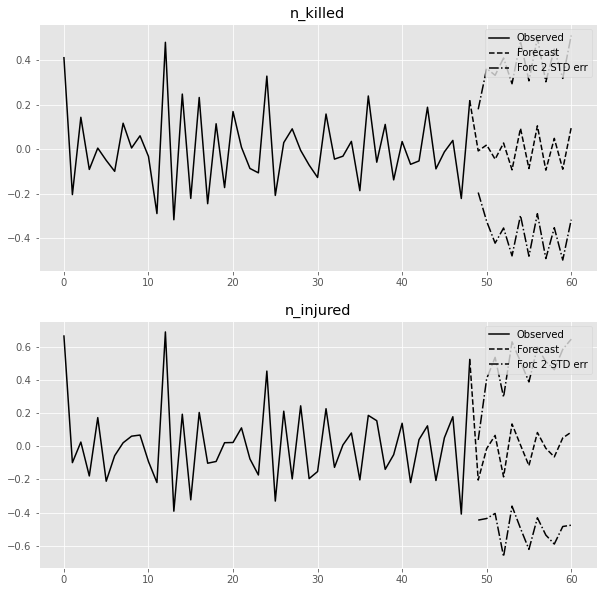

In [32]:
model = VAR(ts_diff)
model.select_order(10)
results = model.fit(maxlags=10, ic='aic')
print('US')
results.plot_forecast(12);

In [33]:
#2.2

In [34]:
def clean1(row):
    if type(row) == str:
        if '||' in row:
            tmp = {}
            row = row.split('||')
            for r in row:
                r = r.split('::')
                for i in range(len(r)-1):
                    tmp[r[i]] = r[i+1]
            res = list(set(list(tmp.values())))
            return res
            if '::' in row:
                row = row.split('::')
                if len(row) == 2:
                    return [row[1]]
        else:
            return ['nan']
    else:
        return ['nan']



In [35]:
cols_to_clean1 = ['gun_stolen', 'gun_type', 'participant_age', 'participant_relationship','participant_age_group', 'participant_gender', 'participant_name', 'participant_status', 'participant_type']
for col in cols_to_clean1:
    df2[col] = df2[col].apply(clean1)

In [36]:
df2

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,day,time
0,95289,2014-01-01,Michigan,Muskegon,300 block of Monroe Avenue,0,0,http://www.gunviolencearchive.org/incident/95289,http://www.mlive.com/news/muskegon/index.ssf/2...,False,...,[nan],[nan],[nan],http://www.mlive.com/news/muskegon/index.ssf/2...,92.0,34.0,2014,1,1,2014-01-01
1,92401,2014-01-01,New Jersey,Newark,Central Avenue,0,0,http://www.gunviolencearchive.org/incident/92401,http://www.nj.com/essex/index.ssf/2014/01/newa...,False,...,[nan],[nan],[nan],http://www.nj.com/essex/index.ssf/2014/01/newa...,29.0,29.0,2014,1,1,2014-01-01
2,92383,2014-01-01,New York,Queens,113th Avenue,1,0,http://www.gunviolencearchive.org/incident/92383,http://www.timesledger.com/stories/2014/2/firs...,False,...,[nan],"[Unharmed, Killed]","[Subject-Suspect, Victim]",http://www.timesledger.com/stories/2014/2/firs...,33.0,14.0,2014,1,1,2014-01-01
3,92142,2014-01-01,New York,Brooklyn,St. Johns Place,0,1,http://www.gunviolencearchive.org/incident/92142,http://www.nydailynews.com/new-york/nyc-crime/...,False,...,[nan],[nan],"[Subject-Suspect, Victim]",http://www.nydailynews.com/new-york/nyc-crime/...,43.0,20.0,2014,1,1,2014-01-01
4,95261,2014-01-01,Missouri,Springfield,Beverly Hills and Temple,0,1,http://www.gunviolencearchive.org/incident/95261,http://www.ozarksfirst.com/story/deputies-6-ye...,False,...,[nan],"[Unharmed, Injured]","[Subject-Suspect, Victim]",http://www.ozarksfirst.com/story/deputies-6-ye...,131.0,30.0,2014,1,1,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239394,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,[nan],[nan],[nan],http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN,2018,3,1,2018-03-01
239395,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,[nan],"[Unharmed, Arrested, Killed]","[Subject-Suspect, Victim]",http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,2018,3,1,2018-03-01
239396,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,[nan],[nan],[nan],http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,2018,3,1,2018-03-01
239397,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,...,[nan],[nan],[nan],http://www.khou.com/article/news/hpd-investiga...,149.0,17.0,2018,3,1,2018-03-01


In [37]:
def clean2(row):
    if type(row) == str:
        if '||' or '|' in row:
            row = row.replace('||', '##').replace('|', '#')
            row = re.split('##|#',row)
            row = list(set(row))
            return row
        else:
            return row
    else:
        return [row]
cols_to_clean2 = ['incident_characteristics']
for col in cols_to_clean2:
    df2[col] = df2[col].apply(clean2)

In [38]:
pd.set_option('display.max_columns', None)
df2

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,day,time
0,95289,2014-01-01,Michigan,Muskegon,300 block of Monroe Avenue,0,0,http://www.gunviolencearchive.org/incident/95289,http://www.mlive.com/news/muskegon/index.ssf/2...,False,2.0,[nan],[nan],[Shots Fired - No Injuries],43.2301,NaN,-86.2514,NaN,bullets entered home,[nan],[nan],[nan],[nan],[nan],[nan],[nan],http://www.mlive.com/news/muskegon/index.ssf/2...,92.0,34.0,2014,1,1,2014-01-01
1,92401,2014-01-01,New Jersey,Newark,Central Avenue,0,0,http://www.gunviolencearchive.org/incident/92401,http://www.nj.com/essex/index.ssf/2014/01/newa...,False,10.0,[nan],[nan],[Officer Involved Incident],40.7417,NaN,-74.1695,NaN,Multiple detectives shot at once from vehicle ...,[nan],[nan],[nan],[nan],[nan],[nan],[nan],http://www.nj.com/essex/index.ssf/2014/01/newa...,29.0,29.0,2014,1,1,2014-01-01
2,92383,2014-01-01,New York,Queens,113th Avenue,1,0,http://www.gunviolencearchive.org/incident/92383,http://www.timesledger.com/stories/2014/2/firs...,False,5.0,[nan],[nan],"[Shot - Dead (murder, accidental, suicide)]",40.7034,NaN,-73.7474,NaN,Perpetrator is being sought by police.,"[22, 26]",[Adult 18+],[Male],"[Julio Mora, Sheldon Smith]",[nan],"[Unharmed, Killed]","[Subject-Suspect, Victim]",http://www.timesledger.com/stories/2014/2/firs...,33.0,14.0,2014,1,1,2014-01-01
3,92142,2014-01-01,New York,Brooklyn,St. Johns Place,0,1,http://www.gunviolencearchive.org/incident/92142,http://www.nydailynews.com/new-york/nyc-crime/...,False,9.0,[nan],[nan],[Shot - Wounded/Injured],40.6715,NaN,-73.9476,NaN,NaN,[nan],[Adult 18+],[Male],[nan],[nan],[nan],"[Subject-Suspect, Victim]",http://www.nydailynews.com/new-york/nyc-crime/...,43.0,20.0,2014,1,1,2014-01-01
4,95261,2014-01-01,Missouri,Springfield,Beverly Hills and Temple,0,1,http://www.gunviolencearchive.org/incident/95261,http://www.ozarksfirst.com/story/deputies-6-ye...,False,7.0,[nan],[nan],[Shot - Wounded/Injured],37.2646,NaN,-93.3007,NaN,NaN,"[6, 12]","[Child 0-11, Teen 12-17]",[nan],[nan],[nan],"[Unharmed, Injured]","[Subject-Suspect, Victim]",http://www.ozarksfirst.com/story/deputies-6-ye...,131.0,30.0,2014,1,1,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239394,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,NaN,[nan],[nan],[Shots Fired - No Injuries],NaN,NaN,NaN,1.0,NaN,[nan],[nan],[nan],[nan],[nan],[nan],[nan],http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN,2018,3,1,2018-03-01
239395,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,4.0,[nan],[nan],"[Institution/Group/Business, Shot - Dead (murd...",31.7537,Shop Rite,-93.0836,1.0,NaN,[nan],[Adult 18+],[Male],"[Jamal Haskett, Jaquarious Tyjuan Ardison]",[nan],"[Unharmed, Arrested, Killed]","[Subject-Suspect, Victim]",http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,2018,3,1,2018-03-01
239396,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,2.0,[nan],[nan],[Shot - Wounded/Injured],29.9239,NaN,-90.0442,1.0,NaN,[nan],[nan],[nan],[nan],[nan],[nan],[nan],http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,2018,3,1,2018-03-01
239397,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.o

In [39]:
cols_to_dummy = ['congressional_district', 
                 'gun_stolen',
                 'gun_type', 
                 'incident_characteristics', 
                 'participant_age_group', 
                 'participant_gender',
                 'participant_relationship',
                 'participant_status',
                 'participant_type', 
                 'state_house_district',
                 'state_senate_district'] 

In [40]:
from tqdm import tqdm
df2_merge = df2.copy()
for col in tqdm(cols_to_dummy):
    tmp = pd.get_dummies(df2[col].apply(pd.Series).stack(),prefix = col[:3], drop_first = True).sum(level=0)
    df2_merge = pd.merge(df2_merge,tmp, left_index=True, right_index= True)


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [09:41<00:00, 52.84s/it]


In [41]:
cols_to_dummy = ['state' ]
for col in tqdm(cols_to_dummy):
    tmp = pd.get_dummies(df2[col], drop_first = True )
    df2_merge = pd.merge(df2_merge,tmp, left_index=True, right_index= True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.20s/it]


In [42]:
df2_merge = df2_merge.set_index(['incident_id', 'date'])

In [43]:
exog_vars = list(df2_merge.columns)
df_exog = df2_merge.copy()
vars_to_rem = ['state', 
               'city_or_county', 
               'address', 
               'n_killed',
                'n_injured',
                'incident_url',
                'source_url',
                'incident_url_fields_missing',
                'notes', 
                'sources', 
                'year',
                'month',
                'day',
                'time',
               'incident_characteristics',
              'location_description',
               'gun_stolen',
                'gun_type',
               'participant_age',
                 'participant_age_group',
                 'participant_gender',
                 'participant_name',
                 'participant_relationship',
                 'participant_status',
                 'participant_type',
                 'state_house_district',
                 'state_senate_district',
              'congressional_district',]
for v in vars_to_rem:
    exog_vars.remove(v)

exog_vars

['latitude',
 'longitude',
 'n_guns_involved',
 'con_1.0',
 'con_2.0',
 'con_3.0',
 'con_4.0',
 'con_5.0',
 'con_6.0',
 'con_7.0',
 'con_8.0',
 'con_9.0',
 'con_10.0',
 'con_11.0',
 'con_12.0',
 'con_13.0',
 'con_14.0',
 'con_15.0',
 'con_16.0',
 'con_17.0',
 'con_18.0',
 'con_19.0',
 'con_20.0',
 'con_21.0',
 'con_22.0',
 'con_23.0',
 'con_24.0',
 'con_25.0',
 'con_26.0',
 'con_27.0',
 'con_28.0',
 'con_29.0',
 'con_30.0',
 'con_31.0',
 'con_32.0',
 'con_33.0',
 'con_34.0',
 'con_35.0',
 'con_36.0',
 'con_37.0',
 'con_38.0',
 'con_39.0',
 'con_40.0',
 'con_41.0',
 'con_42.0',
 'con_43.0',
 'con_44.0',
 'con_45.0',
 'con_46.0',
 'con_47.0',
 'con_48.0',
 'con_49.0',
 'con_50.0',
 'con_51.0',
 'con_52.0',
 'con_53.0',
 'gun_Stolen',
 'gun_Unknown_x',
 'gun_nan_x',
 'gun_12 gauge',
 'gun_16 gauge',
 'gun_20 gauge',
 'gun_22 LR',
 'gun_223 Rem [AR-15]',
 'gun_25 Auto',
 'gun_28 gauge',
 'gun_30-06 Spr',
 'gun_30-30 Win',
 'gun_300 Win',
 'gun_308 Win',
 'gun_32 Auto',
 'gun_357 Mag',
 'gu

In [44]:
df2_merge['n_guns_involved'].fillna(0)

incident_id  date      
95289        2014-01-01    0.0
92401        2014-01-01    0.0
92383        2014-01-01    0.0
92142        2014-01-01    0.0
95261        2014-01-01    0.0
                          ... 
1082061      2018-03-31    1.0
1083139      2018-03-31    1.0
1083151      2018-03-31    1.0
1082514      2018-03-31    1.0
1081940      2018-03-31    2.0
Name: n_guns_involved, Length: 199314, dtype: float64

In [45]:
exog_vars = ['latitude', 'longitude', 'n_guns_involved']

df2_merge[exog_vars]

,,latitude,longitude,n_guns_involved
incident_id,date,,,
95289,2014-01-01,43.2301,-86.2514,NaN
92401,2014-01-01,40.7417,-74.1695,NaN
92383,2014-01-01,40.7034,-73.7474,NaN
92142,2014-01-01,40.6715,-73.9476,NaN
95261,2014-01-01,37.2646,-93.3007,NaN
...,...,...,...,...
1082061,2018-03-31,47.6638,-117.2350,1.0
1083139,2018-03-31,31.7537,-93.0836,1.0
1083151,2018-03-31,29.9239,-90.0442,1.0


In [46]:
exog_arr = df2_merge[exog_vars]

In [47]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

exog = sm.add_constant(exog_arr)
mod = PooledOLS(df2_merge.n_killed, exog)
pooled_res = mod.fit()
print(pooled_res)

C:\Users\education\anaconda3\lib\site-packages\linearmodels\shared\exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                          PooledOLS Estimation Summary                          
Dep. Variable:               n_killed   R-squared:                        0.0075
Estimator:                  PooledOLS   R-squared (Between):              0.0075
No. Observations:              112419   R-squared (Within):               0.0000
Date:                Sat, May 01 2021   R-squared (Overall):              0.0075
Time:                        08:35:31   Log-likelihood                -9.007e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      282.74
Entities:                      112419   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                F(3,112415)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             282.74
                            

In [48]:
#The preliminary analysis of p-value suggests that the latitude, longitude and number of guns involved may help explain
#number of killed persons but in terms of predicting future number of shootings, the importance of these features has yet
#to be determined.If information on gun type and number of guns involved is known, an analysis could be performed to see if
#these parameters could help predict the severity of injuries and to a certain extent,the number of killed in a shooting.
